# PV(PersistentVolume)/PVC(PersistentVolumeClaim)

### PV와 PVC 개요

* Pod 개발자 입장에서 스토리지 추상화
  * Pod 개발자가 클러스터에서 스토리지를 사용할 때 인프라 정보숙지 유무?
  * 애플리케이션을 배포하는 개발자가 스토리지 기술의 종류를 몰라도 상관없이  사용할 수 있도록 하는 것이 DevOps에 이상적
* 인프라 관련 처리는 클러스터 관리자의 영역
  * PV와 PVC를 사용해서 관리자와 개발자의 영역 분리

=> 즉 개발자가 인프라 세부 정보(스토리지의 세부 정보 or 물리 디스크의 경로)를 알지 못해도 클러스터의 스토리지를 사용할 수 있도록 도와주는 리소스.


* 연동 원리
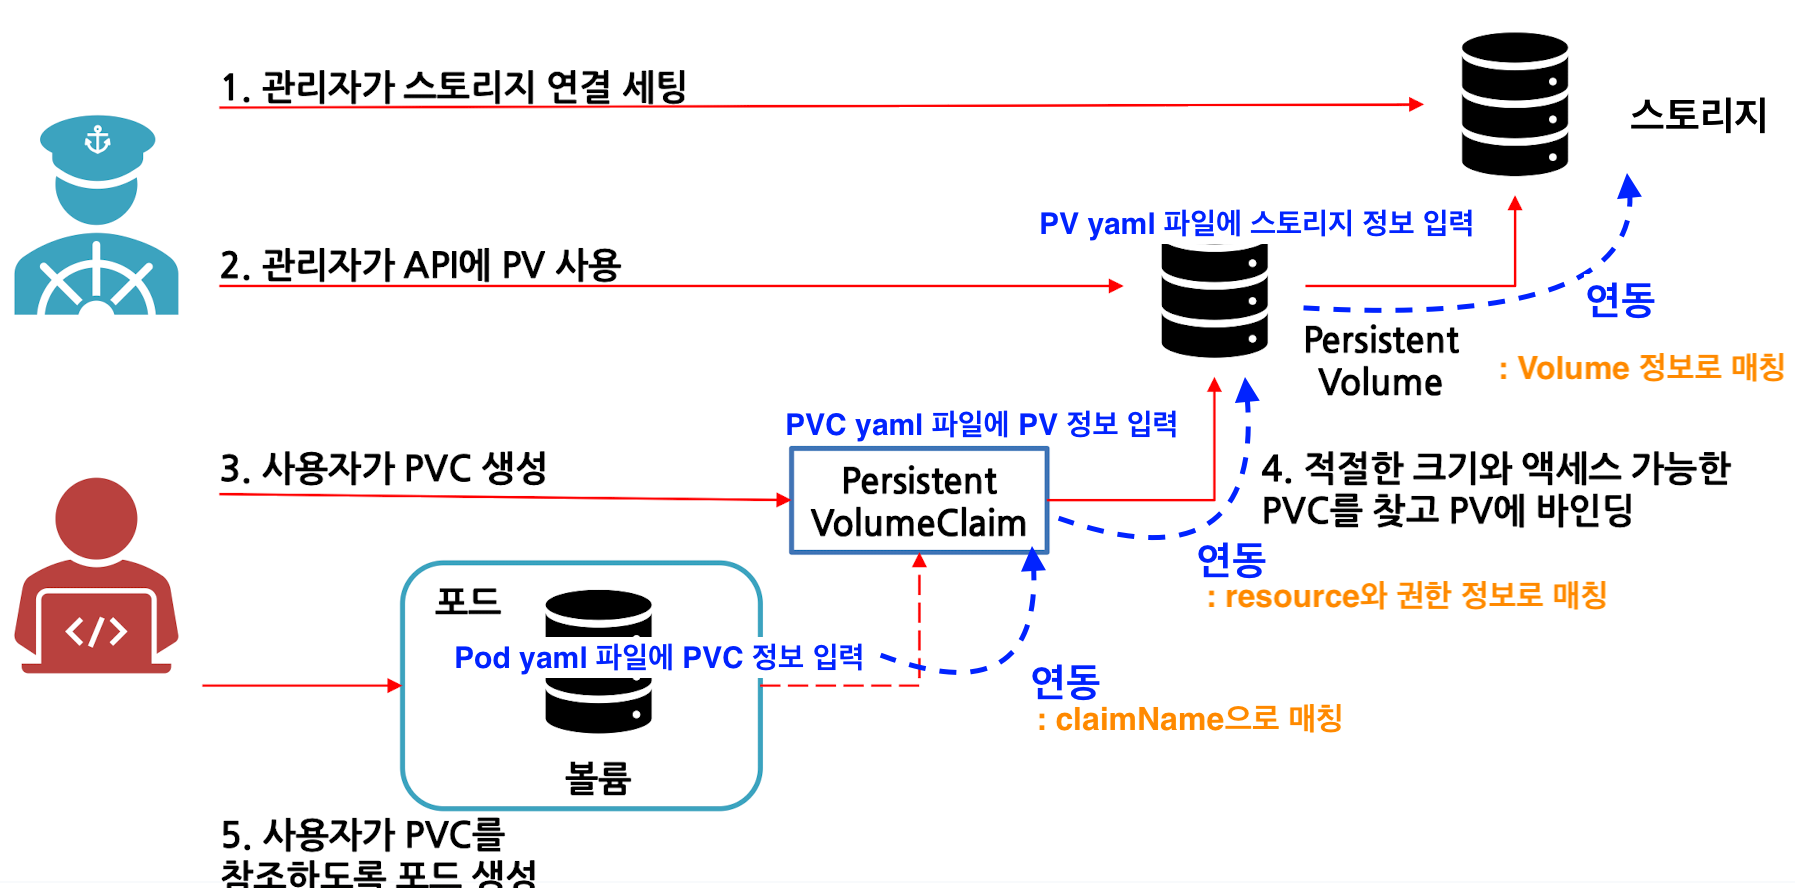



### PVC

* 스토리지 정보를 몰라도 PV와 연결하기 위한 정보만 있으면 된다.
* 아래 정보를 기반으로 매칭되는 PV와 연결된다.
  * spec.accesModes의 array: PV에서 허가한 권한이여야 한다.
  * resources.requests의 value: PV와 일치해야 한다.

#### PVC YAML 작성 요령

[kubernetes docs] > "persistent volume" > [PersistentVolumeClaims]

 PVC YAML 형식
```
apiVersion: v1
kind: PersistentVolumeClaim
metadata:
  name: test-pvc                # Claim 사용시 필요
spec:
  accessModes:
    - ReadWriteOnce             # 단일 클라이언트에 읽기, 쓰기 지원(PV에서 허가한 권한이여야 함)
  volumeMode: Filesystem
  resources:
    requests:
      storage: 8Gi              # 요청하는 스토리지 용량(PV와 일치해야함)
  storageClassName: ""          # 동적 프로비저닝에서 사용
```

### PV

* 실제 물리 스토리지 정보가 있어야 한다.

#### PV 작성 요령

(참고) [kubernetes docs] > "persistent volume" 검색 > [Persistent Volumes] 검색

아래와 같이 PV YAML 형식 복사
```
apiVersion: v1
kind: PersistentVolume
metadata:
  name: test-pv
spec:
  capacity:
    storage: 8Gi                # 요청하는 스토리지 용량(PVC와 일치해야함)
  volumeMode: Filesystem
  accessModes:
    - ReadWriteOnce             # 단일 클라이언트에 읽기, 쓰기 지원(PV에서 허가한 권한)   
  persistentVolumeReclaimPolicy: Recycle    # Volume 정책
  storageClassName: ""
  nfs:                          # 실제 물리 스토리지 정보
    path: {nfs server path}
    server: {nfs server IP}
```

* `persistentVolumeReclaimPolicy` Volume 정책

| Reclaming | 설명 |
| --- | --- |
| Retain(유지) | PVC를 삭제하면 PV는 여전히 존재하지만 Volume은 해제된 거승로 간주. 연관된 스토리지 리소스의 데이터를 수도으로 정리. |
| Delete(삭제) | 외부 인프라의 연관된 스토리지 자산을 모두 제거. | 
| Recycle(재사용) | `rm -rf /thevolume/*` 명령어로 Volume에 대한 기본 스크럽을 수행하고 새 Claim에 대해 다시 사용할 수 있도록 한다. |